# Discrete Likelihood Model Examples

Here we demonstrate the use of the various discrete models implemented in this package. We include basic heuristic examples of data that could be analyzed using these models. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import romus

np.random.seed(42)

## Beta-Binomial Model

The Beta-Binomial is useful for modeling data data with 0 or 1 outcomes. For example, imagine we collected surveys from 2000 high school students asking if they had ever tried smoking a cigarette and that we want to extrapolate the percent of high school students that have ever tried smoking a cigarette using that data.

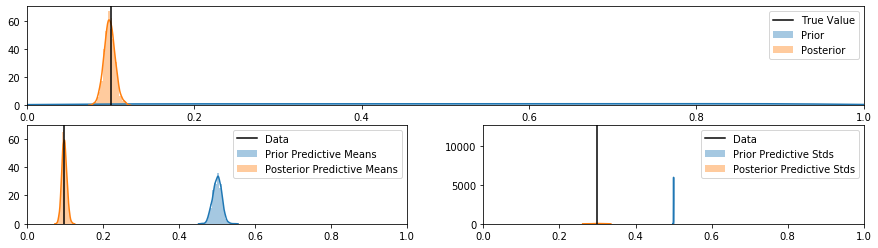

In [2]:
data_size = 2000
data = np.random.binomial(n=1, p=.1, size=(data_size, 1))
#data = np.random.binomial(n=2000, p=.1, size=1)

model = romus.discrete_likelihood.BetaBinomial(1.0, 1.0)
prior_samples = model.sample_prior(1000)
prior_predictive_sample_means = [
    model.sample_prior_predictive(data_size).mean()
    for _ in range(1000)
]
prior_predictive_sample_stds = [
    model.sample_prior_predictive(data_size).std()
    for _ in range(1000)
]
model.fit(data=data)
#alpha_s, beta_s = model.fit(2000, data.sum())
posterior_samples = model.sample_posterior(1000)
posterior_predictive_sample_means = [
    model.sample_posterior_predictive(data_size).mean()
    for _ in range(1000)
]
posterior_predictive_sample_stds = [
    model.sample_posterior_predictive(data_size).std()
    for _ in range(1000)
]

plt.figure(figsize=(15,4))

plt.subplot(211)
sns.distplot(prior_samples, label="Prior")
sns.distplot(posterior_samples, label="Posterior")
plt.axvline(.1, c="k", label="True Value")
plt.xlim(0, 1)
plt.legend()

plt.subplot(223)
sns.distplot(prior_predictive_sample_means, label="Prior Predictive Means")
sns.distplot(posterior_predictive_sample_means, label="Posterior Predictive Means")
plt.axvline(data.mean(), c="k", label="Data")
plt.xlim(0, 1)
plt.legend()

plt.subplot(224)
sns.distplot(prior_predictive_sample_stds, label="Prior Predictive Stds")
sns.distplot(posterior_predictive_sample_stds, label="Posterior Predictive Stds")
plt.axvline(data.std(), c="k", label="Data")
plt.xlim(0, 1)
plt.legend()

plt.show()


## Gamma-Poisson Model

The Gamma-Poisson model is useful for modeling count valued data. For example, imagine you collected data from a sample of 2000 customers of how frequently they ate at your restaurant over a month. You want to sue that data to estimate the rate at which a customer eats at your restaurant a month. 

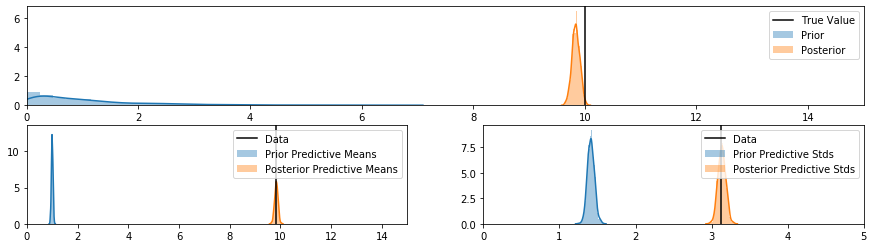

In [3]:
data_size = 2000
data = np.random.poisson(lam=10, size=(data_size, 1))

model = romus.discrete_likelihood.GammaPoisson(1.0, 1.0)
prior_samples = model.sample_prior(1000)
prior_predictive_sample_means = [
    model.sample_prior_predictive(data_size).mean()
    for _ in range(1000)
]
prior_predictive_sample_stds = [
    model.sample_prior_predictive(data_size).std()
    for _ in range(1000)
]
model.fit(data=data)
posterior_samples = model.sample_posterior(1000)
posterior_predictive_sample_means = [
    model.sample_posterior_predictive(data_size).mean()
    for _ in range(1000)
]
posterior_predictive_sample_stds = [
    model.sample_posterior_predictive(data_size).std()
    for _ in range(1000)
]

plt.figure(figsize=(15,4))

plt.subplot(211)
sns.distplot(prior_samples, label="Prior")
sns.distplot(posterior_samples, label="Posterior")
plt.axvline(10, c="k", label="True Value")
plt.xlim(0, 15)
plt.legend()

plt.subplot(223)
sns.distplot(prior_predictive_sample_means, label="Prior Predictive Means")
sns.distplot(posterior_predictive_sample_means, label="Posterior Predictive Means")
plt.axvline(data.mean(), c="k", label="Data")
plt.xlim(0, 15)
plt.legend()

plt.subplot(224)
sns.distplot(prior_predictive_sample_stds, label="Prior Predictive Stds")
sns.distplot(posterior_predictive_sample_stds, label="Posterior Predictive Stds")
plt.axvline(data.std(), c="k", label="Data")
plt.xlim(0, 5)
plt.legend()

plt.show()

## Beta-NegativeBinomial Model

The Beta-NegativeBinomial model is useful for modeling hybrid count and binary data. For example, the number of failures for a binary distributed event before observing a certain number of successes. For example, imagine that we run a business doing door-to-door vacuum sales. Each day go house to house until we have sold four vacuums (our daily sales quota). Using past sales data from 500 days we want to estimate the chance probability of making a sale at a house. The data represents the number of houses visited each day until making 4 sales. We want to predict the probability of a sale at any individual house. 

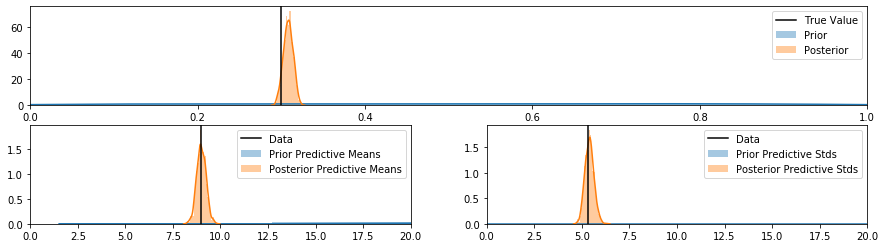

In [4]:
data_size = 500
data = np.random.negative_binomial(n=4, p=.3, size=(data_size, 1))

model = romus.discrete_likelihood.BetaNegativeBinomial(1.0, 1.0, 4)
prior_samples = model.sample_prior(1000)
prior_predictive_sample_means = [
    model.sample_prior_predictive(data_size).mean()
    for _ in range(1000)
]
prior_predictive_sample_stds = [
    model.sample_prior_predictive(data_size).std()
    for _ in range(1000)
]
model.fit(data=data)
posterior_samples = model.sample_posterior(1000)
posterior_predictive_sample_means = [
    model.sample_posterior_predictive(data_size).mean()
    for _ in range(1000)
]
posterior_predictive_sample_stds = [
    model.sample_posterior_predictive(data_size).std()
    for _ in range(1000)
]

plt.figure(figsize=(15,4))

plt.subplot(211)
sns.distplot(prior_samples, label="Prior")
sns.distplot(posterior_samples, label="Posterior")
plt.axvline(0.3, c="k", label="True Value")
plt.xlim(0, 1)
plt.legend()

plt.subplot(223)
sns.distplot(prior_predictive_sample_means, label="Prior Predictive Means")
sns.distplot(posterior_predictive_sample_means, label="Posterior Predictive Means")
plt.axvline(data.mean(), c="k", label="Data")
plt.xlim(0, 20)
plt.legend()

plt.subplot(224)
sns.distplot(prior_predictive_sample_stds, label="Prior Predictive Stds")
sns.distplot(posterior_predictive_sample_stds, label="Posterior Predictive Stds")
plt.axvline(data.std(), c="k", label="Data")
plt.xlim(0, 20)
plt.legend()

plt.show()

## Dirichlet-Multinomial Model

The Dirichlet-Multinomial model is useful for modeling data distributed across non-ordinal categories. For example, imagine you surveyed 2000 potential customers on what their favorite ice cream flavor is (with 5 available options). 

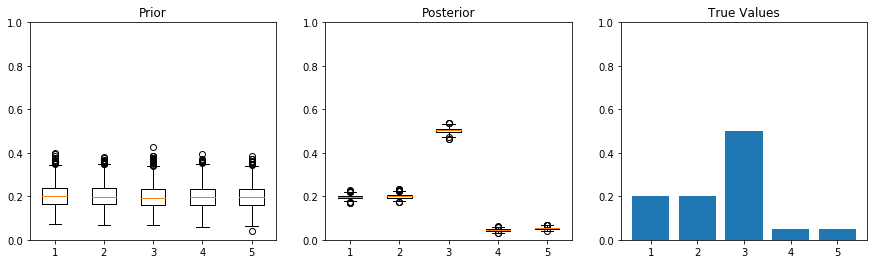

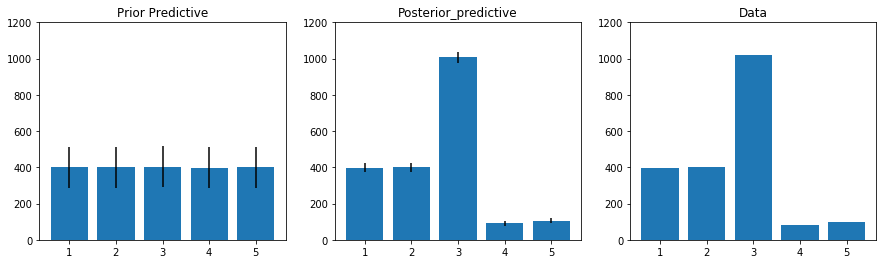

In [5]:
data = np.random.multinomial(n=1, 
                             pvals=[0.2, .2, 0.5, 0.05, 0.05], 
                             size=2000)
# data = np.random.multinomial(n=2000, 
#                              pvals=[0.2, .2, 0.5, 0.05, 0.05], 
#                              size=1).reshape(-1)

model = romus.discrete_likelihood.DirichletMultinomial([10, 10, 10, 10, 10])
prior_samples = model.sample_prior(1000)
prior_predictive_samples = model.sample_prior_predictive(1000, N=2000)
alpha_s = model.fit(data=data)
posterior_samples = model.sample_posterior(1000)
posterior_predictive_samples = model.sample_posterior_predictive(1000, N=2000)

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title("Prior")
plt.boxplot(prior_samples)
plt.ylim(0, 1)
plt.subplot(132)
plt.title("Posterior")
plt.boxplot(posterior_samples)
plt.ylim(0, 1)
plt.subplot(133)
plt.title("True Values")
plt.bar(x=[1, 2, 3, 4, 5],
        height=[0.2, .2, 0.5, 0.05, 0.05])
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title("Prior Predictive")
plt.bar(x=[1,2,3,4,5], 
        height=prior_predictive_samples.mean(axis=0), 
        yerr=prior_predictive_samples.std(axis=0))
plt.ylim(0, 1200)
plt.subplot(132)
plt.title("Posterior_predictive")
plt.bar(x=[1,2,3,4,5], 
        height=posterior_predictive_samples.mean(axis=0), 
        yerr=posterior_predictive_samples.std(axis=0))
plt.ylim(0, 1200)
plt.subplot(133)
plt.title("Data")
plt.bar(x=[1,2,3,4,5],
        height=data.sum(axis=0))
plt.ylim(0, 1200)
plt.show()

## BetaBinomial-Hypergeometeric Model

The BetaBinomial-HyperGeometeric model is useful for estimating the total number of successes in a population of known size for binomial outcomes. For example, imagine we poll voters leaving an election site. We want to estimate the outcome of the election before the official totals are announced, but we only have our poll data (200 samples) and the total number of votes (700). 

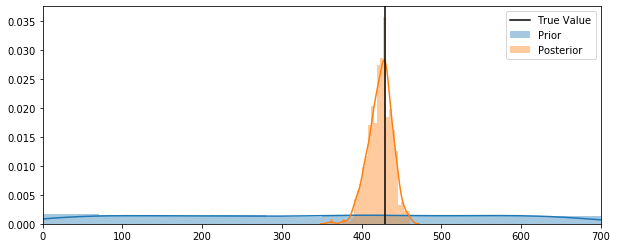

In [6]:
ngood, nbad = 600, 100
N, n = ngood + nbad, 200

data = np.random.hypergeometric(ngood=ngood, nbad=nbad, nsample=n, size=1)

model = romus.discrete_likelihood.BetaBinomialHyperGeometeric(1, 1, N)
prior_samples = model.sample_prior(1000)
alpha_s, beta_s, N_s = model.fit(sum_stats=(n, data.sum()))
posterior_samples = model.sample_posterior(1000)

plt.figure(figsize=(10,4))
sns.distplot(prior_samples, label="Prior")
sns.distplot(posterior_samples, label="Posterior")
plt.axvline(ngood-data.sum(), c="k", label="True Value")
plt.xlim(0, N)
plt.legend()
plt.show()

## Beta-Geometric Model

The Beta-Geometric model is useful for modeling binary data where each sample represents the number of failures until a single success. For example, if we have historic data on the number of days it typically takes before a search party finds a missing person for national park rescue missions. 

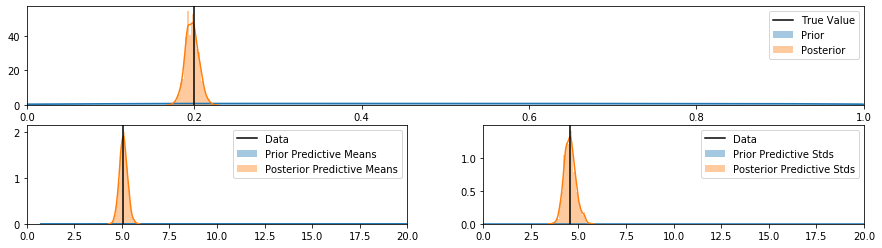

In [7]:
data_size = 500
data = np.random.geometric(p=.2, size=(data_size, 1))

model = romus.discrete_likelihood.BetaGeometric(1, 1)
prior_samples = model.sample_prior(1000)
prior_predictive_sample_means = [
    model.sample_prior_predictive(data_size).mean()
    for _ in range(1000)
]
prior_predictive_sample_stds = [
    model.sample_prior_predictive(data_size).std()
    for _ in range(1000)
]
model.fit(data=data)
posterior_samples = model.sample_posterior(1000)
posterior_predictive_sample_means = [
    model.sample_posterior_predictive(data_size).mean()
    for _ in range(1000)
]
posterior_predictive_sample_stds = [
    model.sample_posterior_predictive(data_size).std()
    for _ in range(1000)
]

plt.figure(figsize=(15,4))

plt.subplot(211)
sns.distplot(prior_samples, label="Prior")
sns.distplot(posterior_samples, label="Posterior")
plt.axvline(0.2, c="k", label="True Value")
plt.xlim(0, 1)
plt.legend()

plt.subplot(223)
sns.distplot(prior_predictive_sample_means, label="Prior Predictive Means")
sns.distplot(posterior_predictive_sample_means, label="Posterior Predictive Means")
plt.axvline(data.mean(), c="k", label="Data")
plt.xlim(0, 20)
plt.legend()

plt.subplot(224)
sns.distplot(prior_predictive_sample_stds, label="Prior Predictive Stds")
sns.distplot(posterior_predictive_sample_stds, label="Posterior Predictive Stds")
plt.axvline(data.std(), c="k", label="Data")
plt.xlim(0, 20)
plt.legend()

plt.show()